In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle

from PattRecClasses import DiscreteD, GaussD, HMM, MarkovChain
from PattRecClasses.func import compute_pX, BaumWelch, HMM_prediction, load_data, plot_fft, plot_prediction_HMM

In [48]:
# Hyper-Params
epochs = 20
window_size = 5

In [49]:
# Load train data
data_train = load_data('data/train.csv', averaging=True, window=window_size)

In [54]:
# Define initial distributions
# q = np.array( [0.8, 0.1, 0.1] )
q = np.array( [1, 0, 0] )
A = np.array( [[0.9, 0.05, 0.05], [0.05, 0.9, 0.05], [0.05, 0.05, 0.9]] )
sub_dist_1 = GaussD( means=[0, 0, 0], cov=np.array([[0.8, 0.1, 0.1], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]]) )
sub_dist_2 = GaussD( means=[0, 0, 0], cov=np.array([[0.8, 0.1, 0.1], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]]) )
sub_dist_3 = GaussD( means=[0, 0, 0], cov=np.array([[0.8, 0.1, 0.1], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]]) )
distribution = [sub_dist_1, sub_dist_2, sub_dist_3]

In [55]:
# Train HMM
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    q, A, distribution = BaumWelch(q, A, distribution, data_train)
    
    # Comment the below lines below if you do not want to see the model training progress and accelerate training
    print('\n\n')
    tqdm.write('Train Epoch: {}/{}'.format(epoch+1, epochs))
    state_train = HMM_prediction(q, A, distribution, data_train)
    plot_prediction_HMM(state_train, data_train, ppi=80, title='Prediction of HMM on training data, Epoch {}'.format(epoch+1))
print('Training Finishes !!!')

Training:   0%|          | 0/20 [00:00<?, ?epoch/s]

In [56]:
# Display trained parameters
np.set_printoptions(linewidth=np.inf, precision=4, suppress=True)
print('Initial State Probability = \n', q.reshape(3,-1))
print('\nState Transition Probability = \n', A)
print('\nDistributions:\n''State_1 (standing) <=> GaussD( means={}, \ncov={} )'.format(distribution[0].means, distribution[0].cov))
print('\nState_2 (walking) <=> GaussD( means={}, \ncov={} )'.format(distribution[1].means, distribution[1].cov))
print('\nState_3 (running) <=> GaussD( means={}, \ncov={} )'.format(distribution[2].means, distribution[2].cov))

Initial State Probability = 
 [[1.]
 [0.]
 [0.]]

State Transition Probability = 
 [[0.9916 0.0084 0.    ]
 [0.0046 0.9769 0.0185]
 [0.     0.0222 0.9778]]

Distributions:
State_1 (standing) <=> GaussD( means=[ 0.0086 -0.0353 -0.0521], 
cov=[[ 0.0084  0.0005  0.0008]
 [ 0.0005  0.0082 -0.0051]
 [ 0.0008 -0.0051  0.0142]] )

State_2 (walking) <=> GaussD( means=[ 0.0173 -0.0686  0.1437], 
cov=[[ 0.1865 -0.0333 -0.1681]
 [-0.0333  0.7151 -0.2081]
 [-0.1681 -0.2081  1.7839]] )

State_3 (running) <=> GaussD( means=[-0.0766  0.3076 -0.4758], 
cov=[[ 2.544   0.7103 -0.7737]
 [ 0.7103  4.7071 -0.9446]
 [-0.7737 -0.9446 14.3541]] )


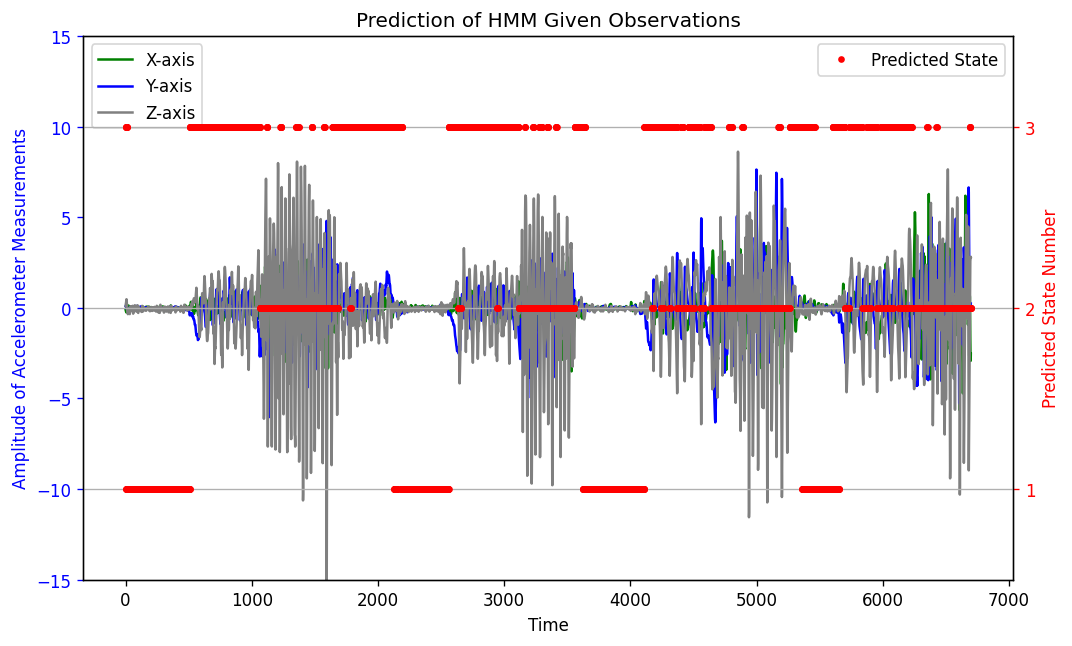

In [53]:
# Model performance on training data
state_train = HMM_prediction(q, A, distribution, data_train)
plot_prediction_HMM(state_train, data_train)

In [7]:
# Save Model Parameters
hmm = HMM(mc=MarkovChain(initial_prob=q, transition_prob=A), distributions=distribution)
with open('weights/hmm_0511_wnd5_epoch30.pkl', 'wb') as param:
    pickle.dump(hmm, param)

In [23]:
# # Load test data
# data_test_1 = load_data('data/test_1.csv', averaging=True, window=window_size)
# data_test_2 = load_data('data/test_2.csv', averaging=True, window=window_size)

# # Load pretrained HMM (optional)
# with open('weights/hmm_0511_wnd5_epoch20.pkl', 'rb') as param:
#     hmm = pickle.load(param)
# q = hmm.stateGen.q
# A = hmm.stateGen.A
# distribution = hmm.outputDistr

# # Model performance on test data 1
# state_test_1 = HMM_prediction(q, A, distribution, data_test_1, decision=False)
# plot_prediction_HMM(state_test_1, data_test_1)

# # Model performance on test data 2
# state_test_2 = HMM_prediction(q, A, distribution, data_test_2, decision=False)
# plot_prediction_HMM(state_test_2, data_test_2)